In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos en un data frame
pd.read_csv("./covid.csv")
df = pd.read_csv("./covid.csv")

# Se eliminan columnas que nbo se vana a usar
delete_columns = ['id', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'other_disease', 'icu']
df.drop(delete_columns, axis=1, inplace=True)

# Se filtran las filas y se eliminan las que tengan valores en 3 (los que no recibieron el resultado) en la columna (covid_res)
df = df[df['covid_res'] != 3]

# Se filtran las filas y se eliminan las que tengan valores en 99 (sin información) en la columna (contact_other_covid)
df = df[df['contact_other_covid'] != 99]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (renal_chronic)
df = df[df['renal_chronic'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (obesity)
df = df[df['obesity'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (tobacco)
df = df[df['tobacco'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (cardiovascular)
df = df[df['cardiovascular'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (hypertension)
df = df[df['hypertension'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (inmsupr)
df = df[df['inmsupr'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (asthma)
df = df[df['asthma'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 98 (sin información) en la columna (copd)
df = df[df['copd'] != 98]

# Se filtran las filas y se eliminan las que tengan valores en 97 (sin información) en la columna (copd)
df = df[df['pregnancy'] != 97]

# Se filtran las filas y se eliminan las que tengan valores en 99 (sin información) en la columna (pneumonia)
df = df[df['pneumonia'] != 99]

# Se filtran las filas y se eliminan las que tengan valores en 97 (sin información) en la columna (intubed)
df = df[df['intubed'] != 97]

In [9]:
# Crear un objeto GaussianNB
nb = GaussianNB()

In [10]:
# Se separan las características de la variable objetivo
X = df.drop('covid_res', axis=1)
y = df['covid_res']

In [11]:
# Dividir el conjunto de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
nb.fit(X_train, y_train)

GaussianNB()

In [14]:
# Evaluar el modelo de conjunto de datos de prueba para hacer predicciones
y_pred = nb.predict(X_test)

In [16]:
# Evaluar el desempeño del modelo
precision = accuracy_score(y_test, y_pred)
print("La precisión del modelo es: {:.2f}%".format(precision * 100))

La precisión del modelo es: 63.59%


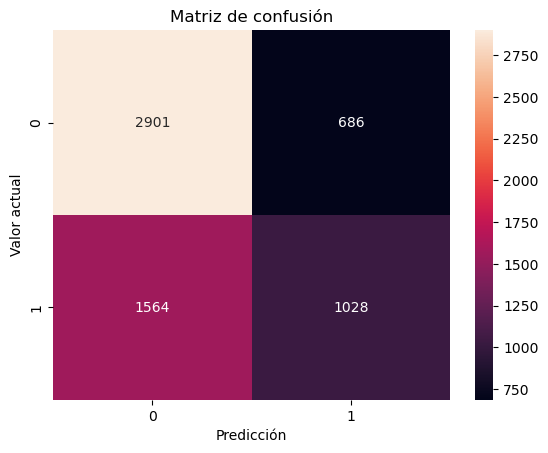

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# se obtinene las predicciones del conjuto de prueba
y_pred = nb.predict(X_test)

# Se crea la matriz de confusión utilizando la función heatmap (seaborn)
cm = confusion_matrix(y_test, y_pred)

# Configurar las etiquetas ejes
sns.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel('Predicción')
plt.ylabel('Valor actual')
plt.title('Matriz de confusión')

# Mostrar la figura
plt.show()

In [21]:
# Se definen las variables del usuario para prueba
paciente = pd.DataFrame({
    'sex': 2,
    'intubed': 2,
    'pneumonia': 2,
    'age': 50,
    'pregnancy': 2,
    'diabetes': 2,
    'copd': 2,
    'asthma': 2,
    'inmsupr': 2,
    'hypertension': 2,
    'cardiovascular': 2,
    'obesity': 2,
    'renal_chronic': 2,
    'tobacco': 2,
    'contact_other_covid': 2
}, index = [0])

In [22]:
# Se realiza predicción para el usuario segun datos ingresados
p = nb.predict_proba(paciente)[0][1]

# Mostrar probabilidad que el paciente tenga covid 19
print("LA probabilidad que el paciete tenga Covid 19 de acuerdo a los sintomas es {:.2f}%".format(p * 100))

LA probabilidad que el paciete tenga Covid 19 de acuerdo a los sintomas es 28.85%
